# CSCI4022 Homework 3; Clustering

## Due Monday, February 22 at 11:59 pm to Canvas

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.

---

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import numpy as np
import random
import pandas as pd
import statsmodels.api as sm
from scipy.stats import multivariate_normal



***
<a/ id='p4'></a>
[Back to top](#top)
# Problem 1 (Theory: GMM; 5 pts) 
In the GMM slides, we stated that the weights $w_m$ of the 1-dimensional GMM with pdf

$f(x|\theta)=w_1\phi(x|\mu_1, \sigma_1^2)+w_2\phi(x|\mu_2, \sigma_2^2)+\dots+ w_m\phi(x|\mu_m, \sigma_m^2)$

required the weights to sum to one.  

#### a) Use the following markdown cell to prove this statement.  In a sentence, describe how this proof might change in higher dimensions.

x has to belong to one of the i gaussian models with probability w_i. if the sum of the weights is not equal to 1, then it is not a valid probability( since the sum of probabilities of an event has to equal 1). This does not change much in higher dimensions, each gaussian model will have weight(probability) and the sum of probabilities has to equal 1.

#### b) Is it possible to have a valid pdf $f(x)$ above if any of the weights $w_k$ are negative?  If not, why not?  If so, what other difficulties might be associated with negative weights?

We cannot have valid pdf with negative weights because sayying an event probability is negative is like sayying it is immposible for that event to occure. One difficulty of having a weight that is negative could be that the sum of probabilties will not equal to 1.

# Problem 2 (Simulation: GMMs and simulated data; 20 pts)

The code below loads up a dataset tracking the eruptions of the geyser Old Faithful in Yellowstone.  It has two features:

- eruptions; numeric; Eruption time in mins
- waiting; numeric; Waiting time to next eruption (in mins)

As the plot shows, these two variables are highly related, and we observe a data set that clearly has multiple distinct modes.

Our goal in this problem is not only to capture the data set with the GMM, but to capture it well enough to simulate *new* eruptions from the original distribution.

     eruptions  waiting
0        3.600       79
1        1.800       54
2        3.333       74
3        2.283       62
4        4.533       85
..         ...      ...
267      4.117       81
268      2.150       46
269      4.417       90
270      1.817       46
271      4.467       74

[272 rows x 2 columns]


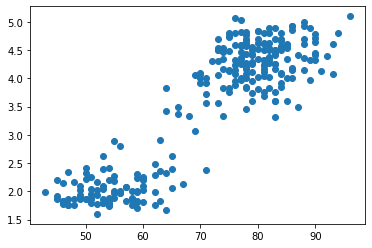

In [4]:
ff= sm.datasets.get_rdataset('faithful').data
print(ff)
plt.scatter(ff['waiting'], ff['eruptions'])

## Part A: Fit Models

Run 5 different 2-D Gaussian Mixture Models on the given data with $k=2, 4, 6, 8, 10$ components.  You may use any form of intialization, but I recommend randomness for ease of use/repetition.

Plot their "elbow plot" of $k$ versus mean-distance-to-centroid.  Does it look like there is a best choice of $k$ from these options?  Does this match your intuition?  Explain.

In [45]:
big_means = [] # big_means is a list of 5 different lists. it is holding lists of means corrospoding for 2,4,6,8,10
big_var =[] #same
big_p_class = []#same
pros = []
model_num = [2,4,6,8,10]
for r in model_num:
    k = r #we assign k (number of compnent)
    pi=1/k #pi represent probability
    p_class = []
    n_class = []
    for i in range(k):
        p_class.append(pi)
        n_class.append(0)
    # here means and variance are each a tuple (_,_) cause 2D
    means = []
    variance = []
    #pick k random indexes(clusters) from the dataset and initilize means and variance lists with k different values.
    for i in range(k):
        index =random.randrange(0,272,1)
        means.append((ff['eruptions'][index],ff['waiting'][index]))

    for i in range(k):
        variance.append(((1/len(ff['eruptions']))*np.sum((ff['eruptions'] - means[i][0])**2),(1/len(ff['waiting']))*np.sum((ff['waiting'] - means[i][1])**2)))

    for _ in range(100):
        #Expectation step
        np.random.multivariate_normal([0,0], [[1,.1],[.1,1]],10)  #sample of size j=10 rho=.1  N(0,1)
        p_data_given_class = []
        p_class_given_data = []
        summ = []
        for i in range(k):
            p_data_given_class.append(stats.multivariate_normal.pdf(ff,means[i],np.sqrt(variance[i])))

        for i in range(k):
            p_class_given_data.append(p_class[i] * p_data_given_class[i])
        

        for j in range(len(p_class_given_data[0])):
            holder =0
            for i in range(k):
                holder+= p_class_given_data[i][j]
            summ.append(holder)
        for i in range(k):    
            p_class_given_data[i] = p_class_given_data[i] / summ
        #print(len(p_class_given_data))
        #Maximization
        for i in range(k):
            n_class[i]= np.sum(p_class_given_data[i])


        for i in range(k):
            p_class[i] = n_class[i]/len(ff)

        for i in range(k):
            means[i] = ((1/n_class[i])*np.sum(p_class_given_data[i]*ff['eruptions']),(1/n_class[i])*np.sum(p_class_given_data[i]*ff['waiting']))
            variance[i] = ((1/n_class[i])*(np.sum(p_class_given_data[i]*(ff['eruptions']-means[i][0])*np.transpose(ff['eruptions']-means[i][0]))), (1/n_class[i])*(np.sum(p_class_given_data[i]*(ff['waiting']-means[i][1])*np.transpose(ff['waiting']-means[i][1]))))
            #covariance[i] = (1/n_class[i])*np.sum(p_class_given_data[i]*((ff['eruptions']-variance[i][0])**2) * (ff['waiting']-variance[i][1]))
    pros.append(p_class_given_data)
    big_means.append(means)
    big_var.append(variance)
    big_p_class.append(p_class)
    
print(big_p_class)
print(big_means[0]) #k=2
print(big_means[1]) #k=4 
print(big_means[2]) #k=6 and so on...

[[0.3678275882231658, 0.6321724117768343], [0.3247797248126434, 0.23074212158497406, 0.1407397397540076, 0.30373841384837497], [0.13777113335383379, 0.09579508474934939, 0.2271100534483844, 0.22968028761444922, 0.09789076000758778, 0.21175268082639545], [0.09576204594415334, 0.2116930409868526, 0.13472233030210073, 0.22709772476970547, 0.09788702770796133, 0.12406964990406433, 0.0543840901925811, 0.0543840901925811], [0.09785661264862029, 0.07175045401463688, 0.21122786501171245, 0.082067721691557, 0.061246547721548056, 0.0563801518296681, 0.09551451005221587, 0.026572027237723197, 0.0703862885799182, 0.22699782121239995]]
[(2.0949236462172194, 54.75670638072414), (4.298214103172138, 80.28827362745024)]
[(4.3746127189326325, 84.65629839770664), (2.003481378830131, 50.97677427401518), (2.276023435677386, 61.301373673888), (4.228582967253894, 75.76381534928989)]
[(2.2457071933342885, 61.06620745298894), (3.9703536530847967, 71.88414974909598), (4.318719808545051, 82.63527181404706), (2.0

In [46]:
avg = [] #this will hold the avg for each of the k's
for i in range(len(model_num)): #loop over k's
    acc= 0
    for k in range(len(ff)): #loop over data points
        dist = 0
        maximum = 0
        index = -1
        for j in range(model_num[i]): #loop over number of components
            if pros[i][j][k] > maximum: #here we want to know which component the point is closest to (by looking at the probabilities)
                maximum = pros[i][j][k]
                index = j # hold the index of the correct component( the component thats closer to the point)
        dist = np.sqrt((ff['eruptions'][k] - big_means[i][index][0])**2 + (ff['waiting'][k] - big_means[i][index][1])**2)
        acc = acc + dist #acculiate distances to find their avg later
    avg.append(acc/len(ff))
print(avg)

[4.682640774776778, 2.775221117776541, 1.9791134898005103, 1.6474669289472441, 1.3186482235783026]


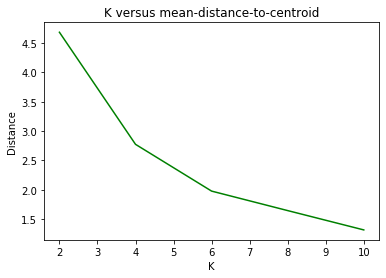

In [47]:
#plt.subplot(1,1,1);
plt.title("K versus mean-distance-to-centroid") 
plt.xlabel("K") 
plt.ylabel("Distance") 
plt.plot(model_num,avg,color = 'green') 

plt.show()

We expect the mean distance to centroid to decrease as the number of components increase, because points will be clustered over more components. From the above example, we can see that the best k is equal to 6, because thats is where the slope become less steep. 

## Part B: Simulate from Models

Because the GMM is a *generative* model, we could use our results from part $A$ to not only score models based on their mean-distance-to-centroid (or other statistical measures like AIC, BIC), we could simulate points from the models and visually ascertain whether or not they appear similar to the original distribution.

For each of the 5 GMM models in part a), simulate 272 points from your estimated density function (recall: this is a two-part simulation of choosing a component **then** drawing from the normal of appropriate mean/covariance).

Create a figure with 2 columns and 3 rows holding all 6 data sets: the 5 simulated ones and the original data shown above.  Label each plot appropriately.  

In [48]:
def gmm_samples(num_samples, mu, var, p_class,comp):
    samples = []
    comp_num =[]
    counter = 0
    for i in range(comp):
        comp_num.append(counter)
        counter = counter+1
    for k in range(num_samples):
        # Sample Delta ~ Bernoulli(pi)
        delta = np.random.choice(comp_num, p=p_class) 
        # Sample from the appropriate normal distribution
        holder = stats.norm.rvs(loc=mu[delta], scale=np.sqrt(var[delta]))
        samples.append([holder[0],holder[1]])
        #samples.append(stats.norm.rvs(loc=mu1, scale=np.sqrt(var1)))
    return samples

data =[]
tuples =[]
X=[]
Y=[]
for i in range(len(model_num)):
    data.append(gmm_samples(272,big_means[i],big_var[i],big_p_class[i],model_num[i]))
for i in range(len(data)):
    x =[]
    y = []
    for j in range(272):
        x.append(data[i][j][0])
        y.append(data[i][j][1])
    X.append(x)
    Y.append(y)

    

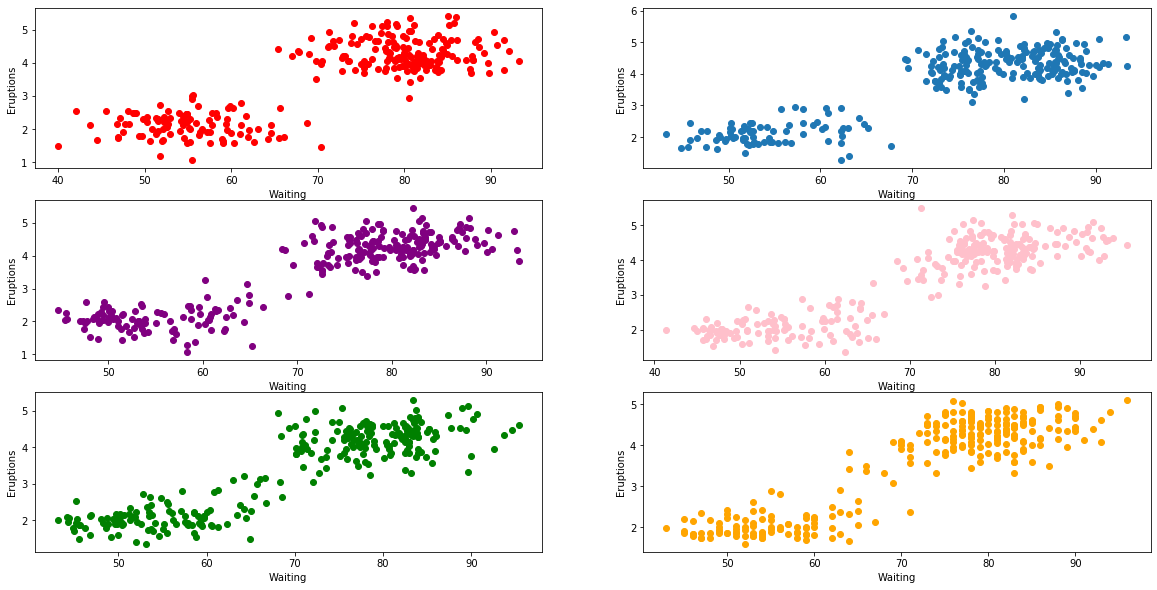

In [52]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(3,2,1);
plt.xlabel("Waiting") 
plt.ylabel("Eruptions")
plt.scatter(Y[0],X[0],color = 'red',label="k=2") 

plt.subplot(3,2,2);
plt.xlabel("Waiting") 
plt.ylabel("Eruptions")
plt.scatter(Y[1],X[1],label="k=4")

plt.subplot(3,2,3);
plt.xlabel("Waiting") 
plt.ylabel("Eruptions")
plt.scatter(Y[2],X[2],color = 'purple',label="k=6") 

plt.subplot(3,2,4);
plt.xlabel("Waiting") 
plt.ylabel("Eruptions")
plt.scatter(Y[3],X[3],color='pink',label="k=8")

plt.subplot(3,2,5);
plt.xlabel("Waiting") 
plt.ylabel("Eruptions") 
plt.scatter(Y[4],X[4],color = 'green',label="k=10")

plt.subplot(3,2,6);
plt.xlabel("Waiting") 
plt.ylabel("Eruptions")
plt.scatter(ff['waiting'],ff['eruptions'],color ='orange',label="original data")

## Part C: Discussion

Which plot or plots look closest to the original data?  Depending on your interpretations of the elbow plot versus the simulated data, you may have decided that we wanted a different value of $k$ for the best model to *simulate* from rather than the best model to *cluster* or classify upon.  Do you think that this is normally the case?  Why or why not?  What properties of a data set would make one task easier or harder with more or less $k$?

All the plots look similar to the original data. This is not normally the case because as we can see in this example the value of k is not that important (does not change much). If our data contains alot of outliers then higher value of k could help capture everything. 



# Problem 3 (Practice:k-means and clustering similarities; 20 pts)

Our goal in this problem is to get a better understanding of two important facets of clustering: ways to compare between clusters and how much initialization might matter for e.g. kmeans.

The code below loads up a well known dataset extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).  The columns are:

- mpg:	Miles/(US) gallon
- cyl:	Number of cylinders
- disp:	Displacement (cu.in.)
-  hp:	Gross horsepower
- drat:	Rear axle ratio
- wt:	Weight (1000 lbs)
- qsec:	1/4 mile time
- vs:	Engine (0 = V-shaped, 1 = straight)
- am:	Transmission (0 = automatic, 1 = manual)
- gear:	Number of forward gears
- carb:	Number of carburetors

We're going to attempt to cluster this data using **4** of these columns: mpg, disp, wt, and qsec.

                mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
Mazda RX4      21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
Datsun 710     22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1


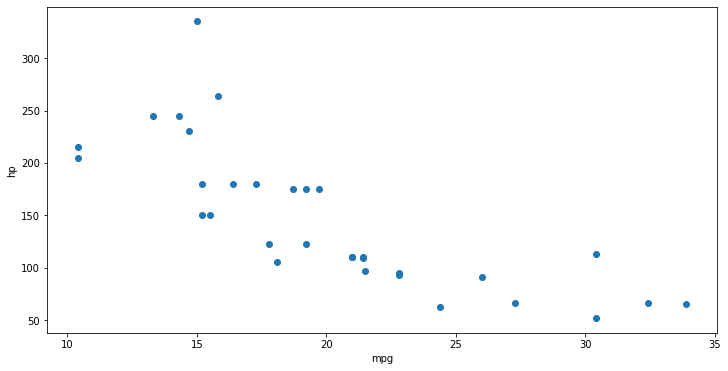

In [5]:
cars= sm.datasets.get_rdataset('mtcars').data
print(cars.head(3))

#example plot of mpg x hp
fig, ax= plt.subplots(figsize=(12,6))
plt.scatter(cars['mpg'], cars['hp'])
ax.set_xlabel('mpg')
ax.set_ylabel('hp');

## Part A) K-means and Normalization: Intuition

The first question we should ask is whether or not to normalize our data.  Use the pandas methods `describe` on the data frame.  What do you expect to happen if we cluster without normalizing the data?  Why?



In [6]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [7]:
cars.head(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


 We need to normalize sincne the four columns have different units. Thus making the difference between some columns look small (example: mpg and cyl) and some other columns to be big( mpg and disp) which is not accurate and does not account for units. When we nomalize our data, we make them unitless.

## Part B) K-means and Normalization: First Clusters 

Now do initial, unnormalized clustering for $k=3$.  Save the final cluster for each point.  Plot the final clusters on an `mpg` versus `disp` axis.

In [4]:
#return distance between points.
def dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2)) #2-d euclidean distance


In [5]:
#most of this is borrowed from class notebooks
#Initialize
K = 3
X = np.array(cars[['mpg','disp']])
x1_coords = [x[0] for x in X]
centroids = np.array([X[x1_coords.index(min(x1_coords))], \
                      X[x1_coords.index(max(x1_coords))], \
                     X[x1_coords.index(np.median(x1_coords))]])
dists = [0]*K
unnorm_clusters = np.array([-1]*len(X))


In [6]:
for _ in range(100): #100 steps is fine; or a tolerance/change check.
    #update classifications
    for j in range(len(X)):
        dists = [dist(X[j], cent) for cent in centroids]
        assignment = dists.index(min(dists))
        unnorm_clusters[j] = assignment
    #update centroids
    for j in range(K):
        centroids[j]=[np.sum(X[unnorm_clusters==j,0])/len(X[unnorm_clusters==j,0]),np.sum(X[unnorm_clusters==j,1])/len(X[unnorm_clusters==j,1])]


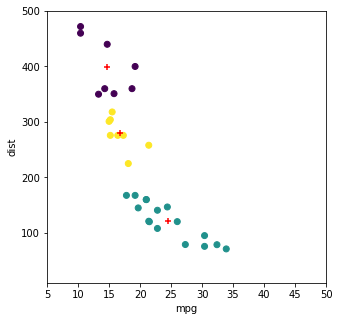

In [8]:
#final cluster plot
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.scatter([x[0] for x in X], [x[1] for x in X], c=unnorm_clusters)
plt.scatter([x[0] for x in centroids], [x[1] for x in centroids], c='red', marker='+')

plt.axis([5, 50, 10, 500])
plt.xlabel("mpg")
plt.ylabel("dist")
plt.show()


## Part C) K-means and Normalization: An Alternative

Normalize the 4 columns being used by replacing each with their Box-Muller transformation (for each column, subtract the mean of that column then divide by its standard deviation).  Repeat your clustering for $k=3$, again saving the final cluster for each point.  Plot the final clusters on an `mpg` versus `disp` axis.

Then answer: do the clusterings look different?

In [9]:
norm_cars =pd.DataFrame()
for x in range(len(cars)):
    norm_cars['norm_mpg'] = (abs(cars['mpg'] - cars['mpg'].mean())/cars['mpg'].std())
    norm_cars['norm_disp'] = (abs(cars['disp'] - cars['disp'].mean())/cars['disp'].std())
    norm_cars['norm_wt'] = (abs(cars['wt'] - cars['wt'].mean())/cars['wt'].std())
    norm_cars['norm_qsec'] = (abs(cars['qsec'] - cars['qsec'].mean())/cars['qsec'].std())
norm_cars.head()

,norm_mpg,norm_disp,norm_wt,norm_qsec
Mazda RX4,0.150885,0.570620,0.610400,0.777165
Mazda RX4 Wag,0.150885,0.570620,0.349785,0.463781
Datsun 710,0.449543,0.990182,0.917005,0.426007
Hornet 4 Drive,0.217253,0.220094,0.002300,0.890487
Hornet Sportabout,0.230735,1.043081,0.227654,0.463781


In [11]:
K = 3
#however...
X = np.array(norm_cars[['norm_mpg','norm_disp']])
x1_coords = [x[0] for x in X]
med=[np.median(x1_coords) , np.median(norm_cars['norm_disp'])]
#print( med)
#print(X['norm_disp'][x1_coords.index(min(x1_coords))])
#centroids = np.array(min(x1_coords))
centroids = np.array([X[x1_coords.index(min(x1_coords))], X[x1_coords.index(max(x1_coords))], med])
#print(centroids)
dists = [0]*K
norm_clusters = np.array([-1]*len(X))


In [12]:
for _ in range(100): #100 steps is fine; or a tolerance/change check.
    #update classifications
    for j in range(len(X)):
        dists = [dist(X[j], cent) for cent in centroids]
        assignment = dists.index(min(dists))
        norm_clusters[j] = assignment
    #update centroids
    for j in range(K):
        centroids[j]=[np.sum(X[norm_clusters==j,0])/len(X[norm_clusters==j,0]),np.sum(X[norm_clusters==j,1])/len(X[norm_clusters==j,1])]

print(norm_clusters)

[0 0 0 0 0 0 2 2 0 0 0 0 0 2 1 1 2 1 1 1 0 2 2 2 0 2 2 1 2 0 2 0]


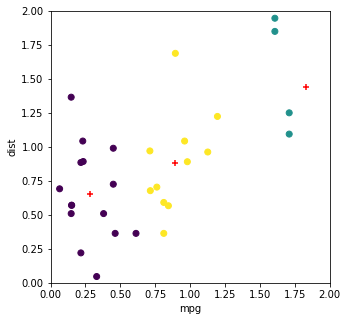

In [13]:
#final cluster plot
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.scatter([x[0] for x in X], [x[1] for x in X], c=norm_clusters)
plt.scatter([x[0] for x in centroids], [x[1] for x in centroids], c='red', marker='+')

plt.axis([0, 2, 0, 2])
plt.xlabel("mpg")
plt.ylabel("dist")
plt.show()



## Part D) The Rand Statistic
We need to formalize wheter or not normalizing actually mattered, which requires a measurement of whether or not two clusterings are actually different from one another! 

To do this we are going to use the Rand statistic, with documentation here: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

Use the `adjusted_rand_score` metric loaded below and compare the two clusterings from parts A and B.

In [14]:
from sklearn.metrics.cluster import adjusted_rand_score
print(adjusted_rand_score([1, 0, 1], [0,1,0])) #example that's actually the same assignments!
print(adjusted_rand_score([1, 0, 1], [0,0,1])) #example: Rand score is negative if very different

#How do your clusters compare?
print(adjusted_rand_score(unnorm_clusters,norm_clusters))

1.0
-0.49999999999999994
0.025600910254586853


 I got 0.0256 which is a small number, so my normalized and unnormalized clusters do not like the same! 



## Part E) ...and then repeat.

Of course, it turns out that kmeans might *also* depend on initializations, and we want to make sure that random initializations aren't affecting your clusters in parts A and B.  One way to ensure that we don't get "unlucky" results is to repeat our experiment with many different initializations, and then choose the "best" one.  A Rand statistic gives us a mechanism to do this!


### E. i) 
Run k-means 100 times for $k=3$ on the *unnormalized* data, each with a different random initialization.

In other words, perform the following operations 100 times:

    1) Initialize k-means by randomly selecting `k' of your data points
    2) Run k-means until convergence
    3) Save the final cluster for each point
    
    
A few rows of your final k=3 output might be:

`dfk3.head(3)'

| Point # | Run1 | Run2 | Run3 | ... | Run 100 |
| --- | --- |
| 1 | 1 | 2 | 1| ... | 1 |
| 2 | 3 | 1 | 3 | ... | 3|
| 3 | 1 | 2 | 1 | ... | 1|

(so in this example, points 1 & 3 were always in the same cluster, but point 2 was elsewhere)



In [15]:
#Initialize
K = 3
X = np.array(cars[['mpg','disp']])
x1_coords = [x[0] for x in X]
unnorm_result = []
for i in range(100):
    #choose k random values from x1 coords
    random_k = random.sample(x1_coords,K)

    #match the k random values with their y values in order to get k centroids
    centroids = np.array([X[x1_coords.index(random_k[0])], \
                          X[x1_coords.index(random_k[1])], \
                         X[x1_coords.index(random_k[2])]])
    dists = [0]*K
    unnorm_clusters = np.array([-1]*len(X))

    for _ in range(100): #100 steps is fine; or a tolerance/change check.
        #update classifications
        for j in range(len(X)):
            dists = [dist(X[j], cent) for cent in centroids]
            assignment = dists.index(min(dists))
            unnorm_clusters[j] = assignment
        #update centroids
        for j in range(K):
            centroids[j]=[np.sum(X[unnorm_clusters==j,0])/len(X[unnorm_clusters==j,0]),np.sum(X[unnorm_clusters==j,1])/len(X[unnorm_clusters==j,1])]
    unnorm_result.append(unnorm_clusters)
print(unnorm_result[0])

C:\Users\Tamer\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


[2 2 2 1 0 1 0 2 2 2 2 1 1 1 0 0 0 2 2 2 2 1 1 0 0 2 2 2 0 2 1 2]


### E. ii) 
Run k-means 100 times for $k=3$ on the *normalized* data, each with a different random initialization.  Save the results in another data frame.

In [16]:
#Initialize
K = 3
X = np.array(norm_cars[['norm_mpg','norm_disp']])
x1_coords = [x[0] for x in X]
norm_result = []
for i in range(100):
    #choose k random values from x1 coords
    random_k = random.sample(x1_coords,K)

    #match the k random values with their y values in order to get k centroids
    centroids = np.array([X[x1_coords.index(random_k[0])], \
                          X[x1_coords.index(random_k[1])], \
                         X[x1_coords.index(random_k[2])]])
    dists = [0]*K
    norm_clusters = np.array([-1]*len(X))

    for _ in range(100): #100 steps is fine; or a tolerance/change check.
        #update classifications
        for j in range(len(X)):
            dists = [dist(X[j], cent) for cent in centroids]
            assignment = dists.index(min(dists))
            norm_clusters[j] = assignment
        #update centroids
        for j in range(K):
            centroids[j]=[np.sum(X[unnorm_clusters==j,0])/len(X[unnorm_clusters==j,0]),np.sum(X[unnorm_clusters==j,1])/len(X[unnorm_clusters==j,1])]
    norm_result.append((norm_clusters,centroids))
print(norm_result[0])

(array([0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 2,
       2, 2, 0, 1, 2, 1, 2, 0, 2, 0]), array([[0.34735091, 0.63362751],
       [1.56674792, 1.17898511],
       [0.78733188, 0.93625422]]))


### E. iii) 

For the 100 runs on the unnormalized data, create a similarity matrix of all-pairwise Rand scores.  Select the run with the highest overall summed Rand scores as the "most indicative run" (note: this is actually the clustroid of the clusters, if we consider Rand similarity an approximate distance!).


In [18]:
scores =[] 
for i in range(len(unnorm_result)):
    val = 0
    for j in range(len(unnorm_result)):
        val += adjusted_rand_score(unnorm_result[i],unnorm_result[j])
    scores.append(val)
most= unnorm_result[scores.index(max(scores))]
print(most)

[0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0]



### E. iv) 

For the 100 runs on the normalized data, create a similarity matrix of all-pairwise Rand scores.  Select the run with the highest overall summed Rand scores as the "most indicative run" (note: this is actually the clustroid of the clusters, if we consider Rand similarity an approximate distance!).



In [23]:
scores =[] 
for i in range(len(norm_result)):
    val = 0
    for j in range(len(norm_result)):
        val += adjusted_rand_score(norm_result[i][0],norm_result[j][0])
    scores.append(val)
most1= norm_result[scores.index(max(scores))]
print(most1[0])

[0 0 2 0 0 0 2 2 0 0 0 0 0 0 1 1 2 1 1 1 0 2 2 2 0 1 2 1 2 0 2 0]


### E. v)  

Compare the two runs selected by parts E.iii and E.iv.  Are they identical, or can we definititely say that normalization effects the clustering in this problem?


In [24]:
print(adjusted_rand_score(most,most1[0]))

0.02370212416960546


They are not identical, beucase their rand scores is kind of low. 

## Part F) Visualize
Plot the best $k=3$ cluster resulting from clustering the *normalized* data, but use the original data scale in the plot.  Use mpg versus displacement for the axes.  Color the clusters, and label each point with the car name.

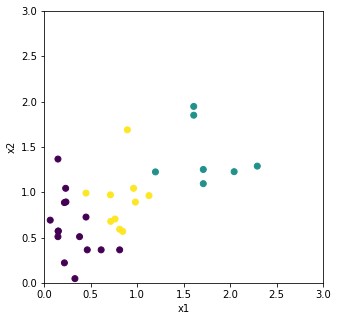

In [29]:
#final cluster plot
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.scatter([x[0] for x in X], [x[1] for x in X], c=most1[0])
#plt.scatter([x[0] for x in most1[0]], [x[1] for x in most1[1]], c='red', marker='+')

plt.axis([0, 3, 0, 3])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()